# Distributions Revisited

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Sampling and the Central Limit Theorem

Recall the difference between sample and population. Statisticians (and data scientists!) are often in the position of making predictions about some population based on a sample drawn from that population:

- I interview 100 Washingtonians and take their responses to be representative of state opinions generally.

- I measure the lengths of 200 fish in Puget Sound and speculate about the lengths of _all_ the fish in the Sound.

Question: Are the _statistics_ I calculate on my sample representative of the statistics of the population?

Note: The difference between a sample statistic and the population statistic is called the **sampling error**.

Reflection: What factors might be responsible for a large (or small) sampling error?

Suppose I take many samples and calculate statistics on each. Would _those_ illuminate the population statistics?

The Central Limit Theorem (CLT) says that, under suitable conditions, the sum of independent random variables will converge to a normal distribution in the limit as the number of variables increases infinitely. The CLT will often hold _even when_ the underlying random variables are _not_ themselves normally distributed!

Let's look at some examples:

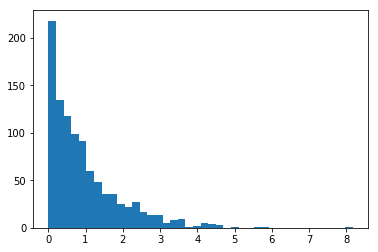

In [10]:
# Let's start with 1000 draws from an exponential distribution.

test = stats.expon.rvs(size=1000, random_state=42)

plt.hist(test, bins=40);

In [26]:
# Let's look at the means of samples from this exponential distribution
# I won't bother specifying a random state this time.
# Let's also experiment with the number of samples we draw.

means = []
for _ in range(100):
    means.append(np.mean(stats.expon.rvs(size=100)))

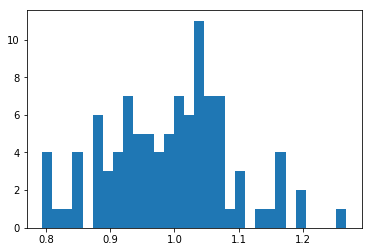

In [16]:
# Let's make a histogram. Suppose we choose about 50 bins.

plt.hist(means, bins=30);

In [23]:
# Now let's try the same thing for binomial random variates.
# We'll use 100 single trials. We can tinker with p.

means = []
for _ in range(100):
    means.append(np.mean(stats.binom.rvs(n=1, p=0.5, size=100)))

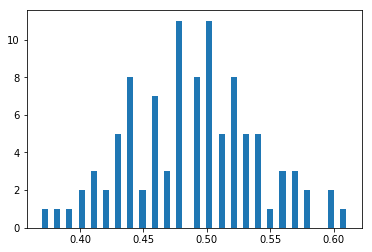

In [24]:
# Plotting here

plt.hist(means, bins=50);

In [27]:
# Let's try it for standard deviations of a geometric distribution.

stds = []
for _ in range(100):
    stds.append(np.std(stats.geom.rvs(p=0.5, size=100)))

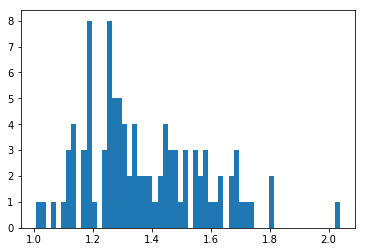

In [28]:
# Plot

plt.hist(stds, bins=60);

In [29]:
# Minimum values of a normal distribution?

mins = []
for _ in range(100):
    mins.append(np.min(stats.norm.rvs(size=100)))

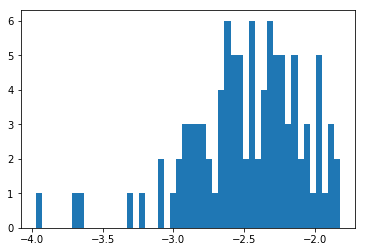

In [30]:
# Plot

plt.hist(mins, bins=50);

### So why do we, as data scientists, care about the Central Limit Theorem?

- Checking the representativeness of our samples, sample sizes
- Sampling can help us determine good guesses for population parameters
- Helps to find outliers